In [1]:
library("ggplot2")
require(gridExtra)
num_trials <- 10000
sample_size <- 50
num_resamples <- 1000

Loading required package: gridExtra


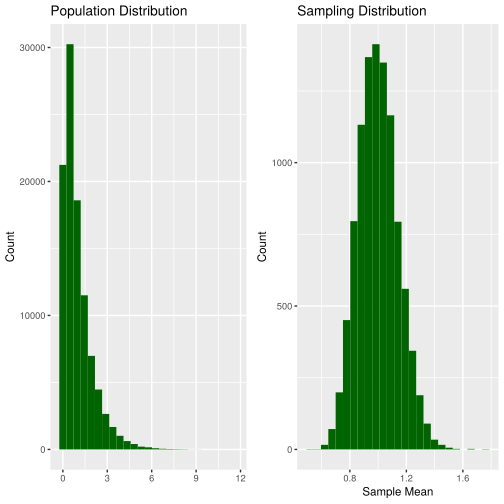

In [2]:
exp_dens <- qplot(sapply(rep(1,100000),rexp),
      bins=25,fill=I("darkgreen"),main="Population Distribution",xlab="",ylab="Count")
sam_dist <- qplot(colMeans(sapply(rep(50,10000),rexp)),
      bins=25,fill=I("darkgreen"),main="Sampling Distribution",xlab="Sample Mean",ylab="Count")
grid.arrange(exp_dens,sam_dist,ncol=2)

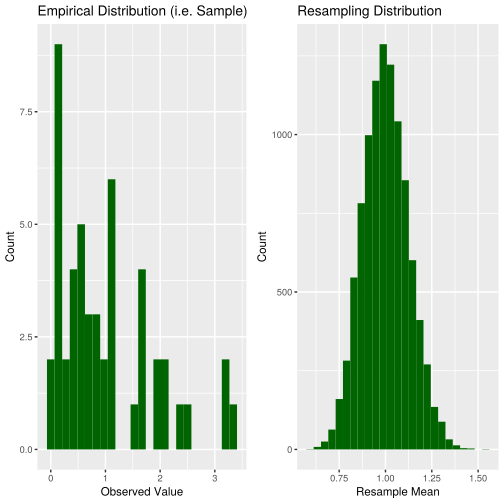

In [3]:
s <- sapply(rep(1,50),rexp)
emp_dist <- qplot(s,bins=25,fill=I("darkgreen"),
            main="Empirical Distribution (i.e. Sample)",xlab="Observed Value",ylab="Count")
res_dist <- qplot(colMeans(replicate(10000,sample(s,50,replace=TRUE))),
            bins=25,fill=I("darkgreen"),main="Resampling Distribution",xlab="Resample Mean",ylab="Count")
grid.arrange(emp_dist, res_dist, ncol=2)

In [4]:
#Collect samples from an exponential distribution with parameter lambda = 1.
samples <- replicate(num_trials, rexp(sample_size))
contained_count = 0

#For each sample we've collected...
for (i in 1:ncol(samples)) {
	#Perform random resampling with replacement, and calculate the mean of each resample.
	resamples <- replicate(num_resamples, sample(samples[,i], sample_size, replace = TRUE))
	means <- sort(colMeans(resamples))
	#The endpoints of a 90% confidence interval (i.e. the 5th and 95th percentiles of 
	#the resampling distribution) are the 50th lowest and 50th highest values obtained
	#since we took a total of 1000 resamples.
	left_end = means[50]
	right_end = means[950]
	#Increment if the interval contains the true mean of the underlying distribution.
	if ((left_end < 1) && (right_end > 1)) {
		contained_count <- contained_count + 1
	}
}

contained_count

8759

In [5]:
#Collect samples from an exponential distribution with parameter lambda = 1.
samples <- replicate(num_trials, rexp(sample_size))
contained_count = 0

#For each sample we've collected...
for (i in 1:ncol(samples)) {
	sample_mean <- mean(samples[,i])
	sample_sd <- sd(samples[,i])
	#Compute the endpoints of a 90% confidence interval computed using critical values
	#from the T-distribution (which, with 49 degrees of freedom, is about 1.68).
	left_end = sample_mean - 1.68 * (sample_sd/sqrt(50))
	right_end = sample_mean + 1.68 * (sample_sd/sqrt(50))
	#Increment if the interval contains the true mean of the underlying distribution.
	if ((left_end < 1) && (right_end > 1)) {
		contained_count <- contained_count + 1
	}
}

contained_count

8881